In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

INPUT_PATH_NOMINAL = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\Nominal\\"
INPUT_PATH_REAL = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\Real\\"

OUTPUT_PATH = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\"

In [13]:
# O primeiro passo é consolidar todas as taxas nominais tratadas em um único df (dfNominal)

list_ = []

for filename in os.listdir(INPUT_PATH_NOMINAL):
#     print(filename)
    if (("Original" not in filename) and (".csv" in filename)) :
#         print(filename)
        list_.append(pd.read_csv(INPUT_PATH_NOMINAL + filename, index_col='Dia'))

dfNominalFixo = pd.concat(list_, sort=False)
dfNominalFixo.index = pd.to_datetime(dfNominalFixo.index)

# Agora importo todas as taxas reais num único df (dfReal)

list_ = []

for filename in os.listdir(INPUT_PATH_REAL):
    if ("Original" not in filename) and (".csv" in filename):
#         print(filename)
        list_.append(pd.read_csv(INPUT_PATH_REAL + filename, index_col='Dia'))

dfRealFixo = pd.concat(list_, sort=False)
dfRealFixo.index = pd.to_datetime(dfRealFixo.index)

In [20]:
# Transformo as taxas de capitalizacao anual para continua
# tc = ln(ta + 1)
dfRealFixo = np.log(dfRealFixo + 1)
dfNominalFixo = np.log(dfNominalFixo + 1)

In [21]:
print(dfNominalFixo.head())

print(dfRealFixo.head())

                   1        30        60        90       360       540  \
Dia                                                                      
2017-01-02  0.116985  0.115873  0.114779  0.113741  0.106720  0.104088   
2017-01-03  0.115955  0.114919  0.113898  0.112930  0.106384  0.103930   
2017-01-04  0.116087  0.114990  0.113912  0.112888  0.105976  0.103393   
2017-01-05  0.115770  0.114648  0.113546  0.112502  0.105552  0.103062   
2017-01-06  0.115008  0.113919  0.112849  0.111836  0.105049  0.102582   

                 720  
Dia                   
2017-01-02  0.102791  
2017-01-03  0.102720  
2017-01-04  0.102128  
2017-01-05  0.101960  
2017-01-06  0.101453  
                   1        30        60        90       360       540  \
Dia                                                                      
2017-01-02  0.057114  0.057095  0.057076  0.057057  0.056883  0.056769   
2017-01-03  0.055669  0.055717  0.055764  0.055810  0.056126  0.056257   
2017-01-04  0.053522  0.

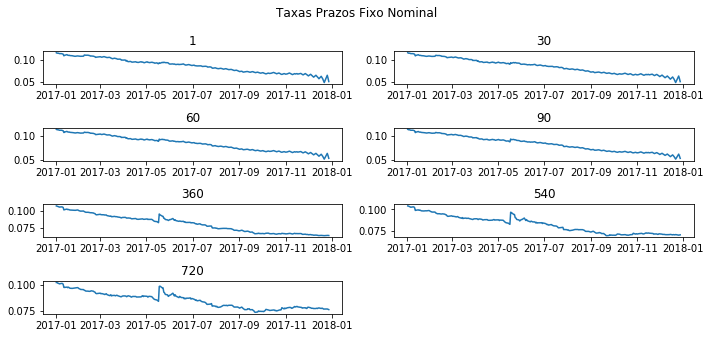

In [22]:
fig = plt.figure(2, figsize=(10, 8))
for key, pz in enumerate(dfNominalFixo.columns):
    ax = plt.subplot(len(dfNominalFixo.columns), 2, key + 1)
    ax.plot(dfNominalFixo[dfNominalFixo.columns[key]])
    ax.set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Prazos Fixo Nominal')
plt.show()


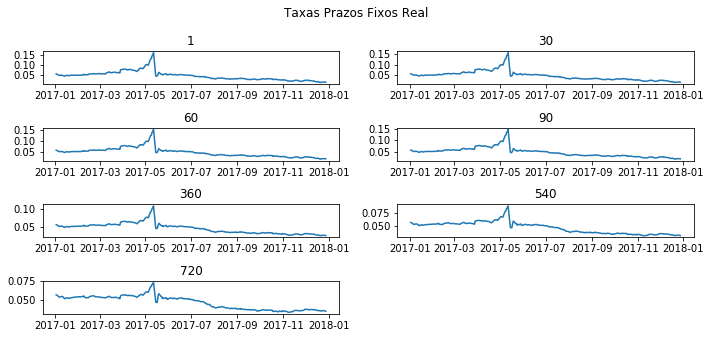

In [23]:
fig = plt.figure(2, figsize=(10, 8))
for key, pz in enumerate(dfRealFixo.columns):
    ax = plt.subplot(len(dfRealFixo.columns), 2, key + 1)
    ax.plot(dfRealFixo[dfRealFixo.columns[key]])
    ax.set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Prazos Fixos Real')
plt.show()

# Analisando as taxas originais

In [18]:
# O primeiro passo é consolidar todas as taxas nominais tratadas em um único df (dfNominal)

list_ = []

for filename in os.listdir(INPUT_PATH_NOMINAL):
    if "Original" in filename:
        list_.append(pd.read_csv(INPUT_PATH_NOMINAL + filename, index_col='Dia'))

dfNominalOriginal = pd.concat(list_, sort=False)
dfNominalOriginal.index = pd.to_datetime(dfNominalOriginal.index)

# Agora importo todas as taxas reais num único df (dfReal)

list_ = []

for filename in os.listdir(INPUT_PATH_REAL):
    if "Original" in filename:
        list_.append(pd.read_csv(INPUT_PATH_REAL + filename, index_col='Dia'))

dfRealOriginal = pd.concat(list_, sort=False)
dfRealOriginal.index = pd.to_datetime(dfRealOriginal.index)

In [265]:
dfNominalOriginal.describe()


,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2021-01-01,2019-01-01,2023-01-01,2020-01-01,2025-01-01
count,249.000000,504.000000,754.000000,996.000000,981.000000,867.000000,646.000000,646.000000,386.000000,142.000000
mean,0.086470,0.103557,0.119121,0.125575,0.118039,0.113501,0.094192,0.109700,0.084622,0.104303
std,0.008132,0.012330,0.018097,0.016484,0.022864,0.023350,0.026147,0.015746,0.009070,0.008954
min,0.070899,0.077123,0.081334,0.084783,0.049835,0.078159,0.061090,0.088212,0.068395,0.092798
25%,0.079366,0.097033,0.110867,0.115653,0.111532,0.092126,0.068057,0.098591,0.079205,0.095576
50%,0.089230,0.107967,0.118541,0.126755,0.122938,0.112712,0.092354,0.105215,0.082730,0.104370
75%,0.093664,0.111420,0.133298,0.136524,0.128615,0.126483,0.118149,0.118855,0.093296,0.112063
max,0.099853,0.171757,0.210463,0.166254,0.163139,0.164382,0.159721,0.163223,0.108534,0.121026


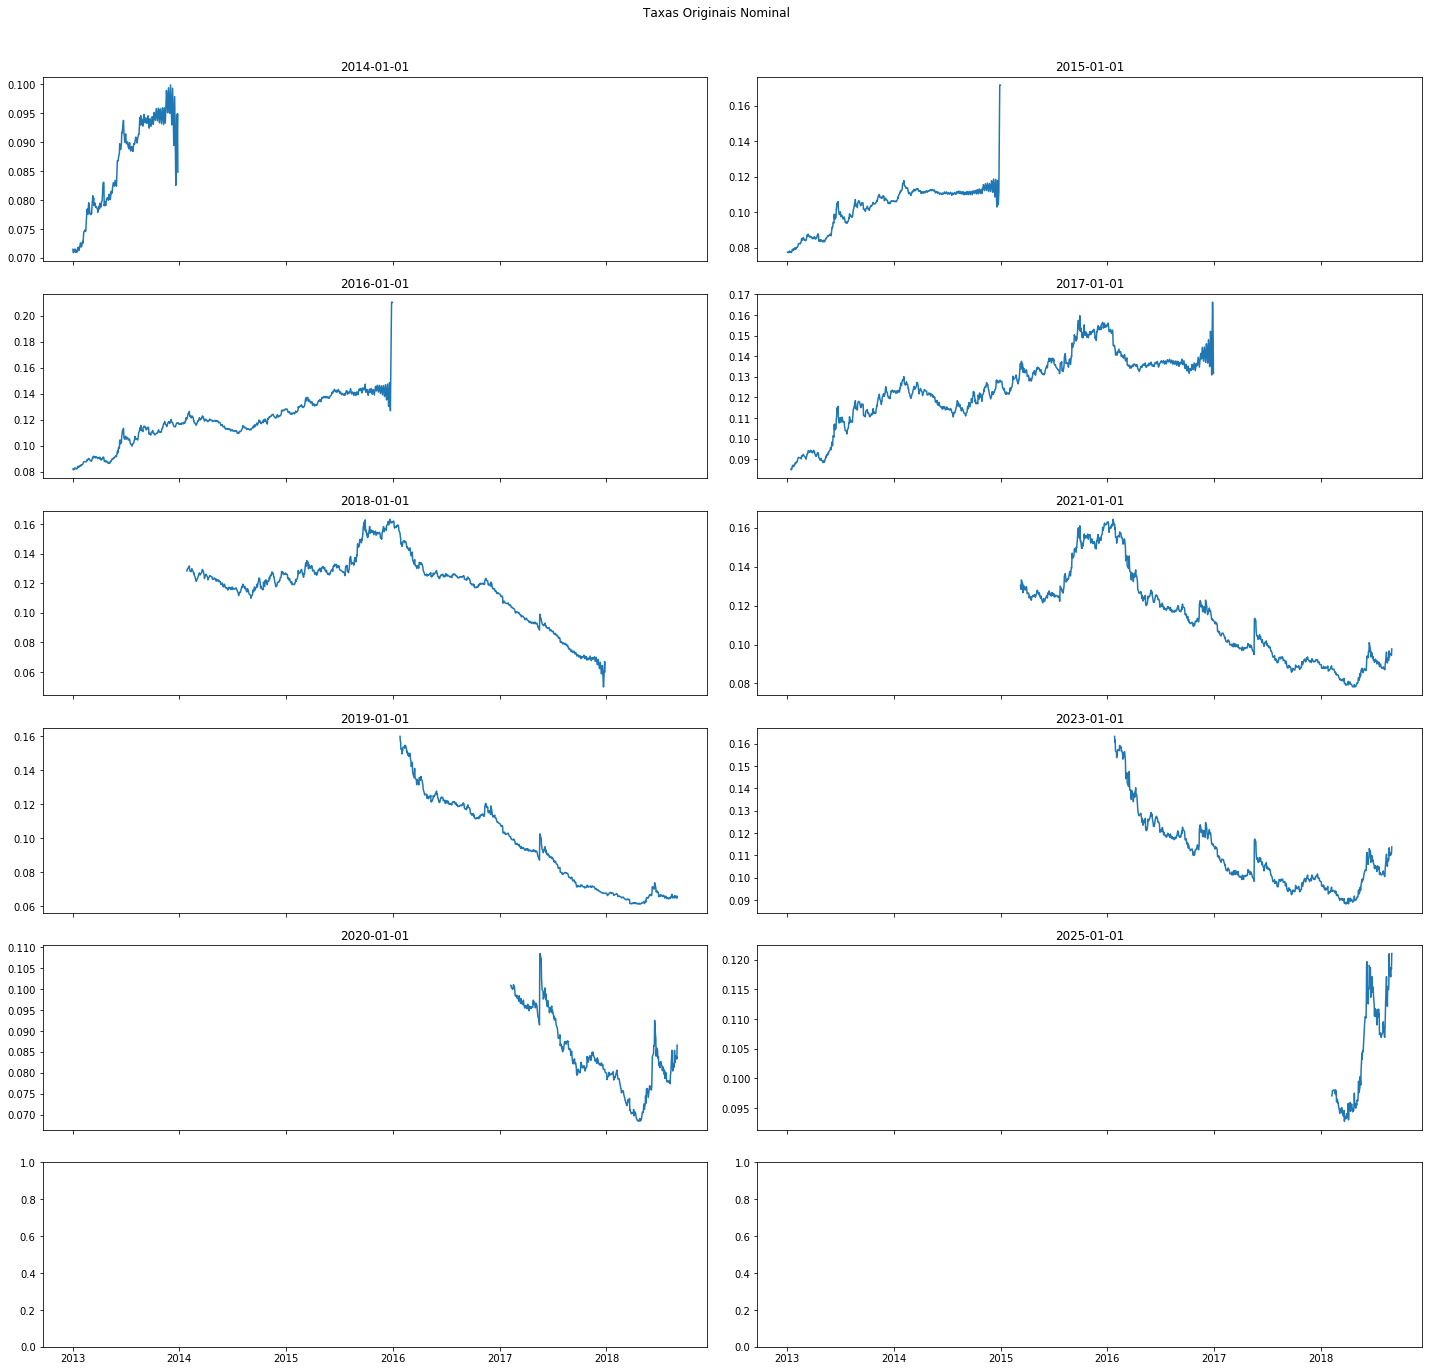

In [346]:
fig, axs = plt.subplots(int(len(dfNominalOriginal.columns)/2) + 1, 2, sharex=True, figsize=(20, 20))
axs = axs.flatten()
for key, pz in enumerate(dfNominalOriginal.columns):
        axs[key].plot(dfNominalOriginal[dfNominalOriginal.columns[key]])
        axs[key].set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Vcto Fixo Nominal')
plt.show()


In [266]:
dfRealOriginal.describe()

,2013-05-15,2015-05-15,2017-05-15,2020-08-15,2024-08-15,2035-05-15,2045-05-15,2050-08-15,2026-08-15
count,90.000000,594.000000,1093.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,646.000000
mean,0.008499,0.053819,0.057557,0.054208,0.057159,0.058490,0.059166,0.058905,0.055805
std,0.032186,0.323917,0.012881,0.011160,0.008586,0.007652,0.007297,0.007098,0.006029
min,-0.235048,-0.012635,0.023188,0.029440,0.034553,0.038245,0.038934,0.039382,0.045850
25%,0.001545,0.027034,0.051839,0.043681,0.052154,0.053480,0.054605,0.054355,0.051164
50%,0.014792,0.038875,0.058475,0.057590,0.057875,0.058271,0.058882,0.058891,0.056032
75%,0.021927,0.044287,0.064084,0.061938,0.062353,0.062658,0.063089,0.063022,0.059490
max,0.033571,7.601975,0.174469,0.078555,0.078504,0.077328,0.076332,0.076105,0.074426


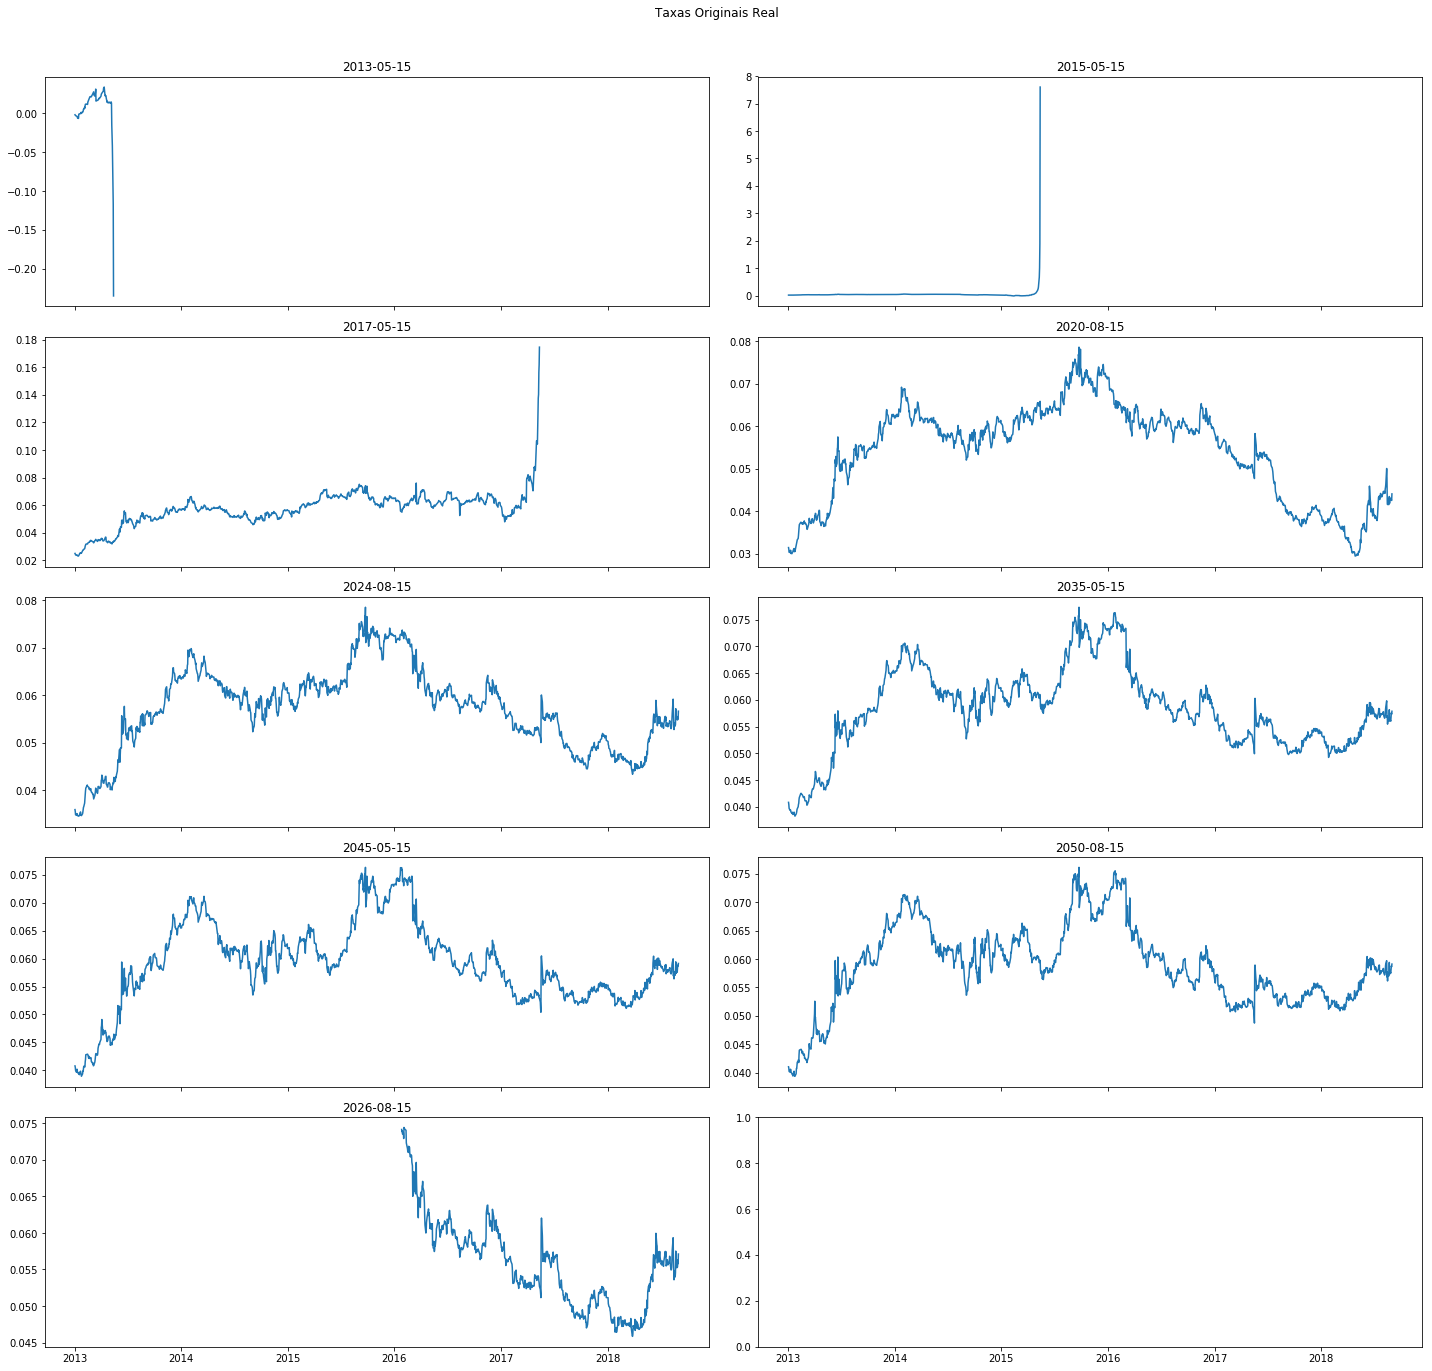

In [342]:
fig, axs = plt.subplots(int(len(dfRealOriginal.columns)/2) + 1, 2, sharex=True, figsize=(20, 20))
axs = axs.flatten()
for key, pz in enumerate(dfRealOriginal.columns):
        axs[key].plot(dfRealOriginal[dfRealOriginal.columns[key]])
        axs[key].set_title(pz)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Taxas Vcto Fixo Real')
plt.show()

# Calculo dos componentes principais via PCA

A proposta do trabalho é calcular a forward rate com base nas taxas de vencimento fixo (parametrização de musiela). Por esse motivo, essa parte do trabalho apenas o df 'dfNominalFixo'

'explained_variance_ratio' contem o % explicado por cada uma das componentes <br>
'components_' são os autovetores <br>
'explained_variance' são os autovalores

In [24]:
from sklearn.decomposition import PCA

## Taxas Nominais

In [25]:
# Cálculo das diferenças
dfDiff = dfNominalFixo['2017':'2017'].diff().dropna()
print(dfDiff.shape)

# Cálculo da Matrix de Covariância de média 0
# n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# covMatrix = np.dot(dfDiffNormCenter.T,dfDiffNormCenter) / n_samples

(245, 7)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

Variância explicada por cada componente
[0.72671372 0.26858421 0.00467903]


<BarContainer object of 3 artists>

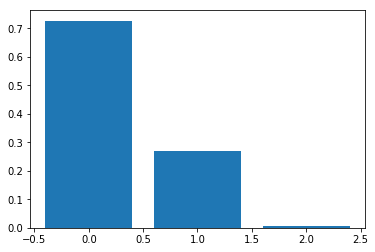

In [26]:
# Escolha da quantidade de componentes desejados
pca3 = PCA(n_components=3)
dfDiffReduzida = pca3.fit(dfDiffNormCenter)

# # Redução do Dataframe
print(dfDiffReduzida, '\n')

# Variância explicada pelo modelo com certa quantidade de componentes
print("Variância explicada por cada componente")
print(pca3.explained_variance_ratio_)

# Em forma de gráfico, a participação de cada componente
features = range(pca3.n_components_)
plt.bar(features, pca3.explained_variance_ratio_)

In [27]:
# print(pca3.components_) # autovetor
# print(" "*10)
# print(pca3.explained_variance_) # autovalor

# Calculo da Vol
# Para cada componente, eu tenho um autovetor e um autovalor associado
# o tamanho do autovetor é igual ao número de vctos (ou vértices) utilizados
# definidos durante o processo de cálculo das txs forwards históricas
componentes3 = []
for eigenvalue, eigenvector in zip(pca3.explained_variance_, pca3.components_):
    componentes3.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes3

[array([0.00167511, 0.00149681, 0.00132907, 0.0011776 , 0.0004205 ,
        0.00033309, 0.00038043]),
 array([-4.10049589e-04, -2.46339238e-04, -9.00202001e-05,  5.35369097e-05,
         8.57617513e-04,  1.03615843e-03,  1.06835695e-03]),
 array([ 6.71129890e-05,  1.39585952e-05, -3.29502774e-05, -7.20533123e-05,
        -1.42645442e-04, -1.13475560e-05,  1.55325071e-04])]

In [28]:
# pca3.components_[0]
# pca3.explained_variance_[0]
(pca3.explained_variance_[0] **(1/2)) * pca3.components_[0]


array([0.00167511, 0.00149681, 0.00132907, 0.0011776 , 0.0004205 ,
       0.00033309, 0.00038043])

In [938]:
# Modelo com n=1 componente
pca1 = PCA(n_components=1)
dfDiffReduzida = pca1.fit(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida, '\n')

# Variância explicada pelo modelo com certa quantidade de componentes
print("Variância explicada por cada componente")
print(pca1.explained_variance_ratio_)


PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

Variância explicada por cada componente
[0.63848825]


In [948]:
componentes1 = []
for eigenvalue, eigenvector in zip(pca1.explained_variance_, pca1.components_):
    componentes1.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes1

[array([0.0007722 , 0.00163545, 0.00098901, 0.00113744])]

## Taxas Reais

In [943]:
# Cálculo das diferenças
dfDiff = dfRealFixo.diff().dropna()
dfDiff = dfDiff['2013':'2013']
print(dfDiff.shape)

# Cálculo da Matrix de Covariância de média 0 
# n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# dfDiffNormCenter = dfDiff

(250, 4)


### Modelo com n=3 componentes

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

Variância explicada por cada componente
[0.93330429 0.05999639 0.00607434]


<BarContainer object of 3 artists>

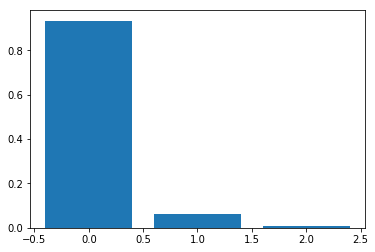

In [950]:
# Escolha da quantidade de componentes desejados
pca3 = PCA(n_components=3)
dfDiffReduzida = pca3.fit(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzida, '\n')

# Variância explicada pelo modelo com certa quantidade de componentes
print("Variância explicada por cada componente")
print(pca3.explained_variance_ratio_)

# Em forma de gráfico, a participação de cada componente
features = range(pca3.n_components_)
plt.bar(features, pca3.explained_variance_ratio_)

In [946]:
componentes3Real = []
for eigenvalue, eigenvector in zip(pca3.explained_variance_, pca3.components_):
    componentes3Real.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes3Real

[array([0.0011289 , 0.00105323, 0.00095329, 0.00083223]),
 array([-3.73445113e-04,  7.35308508e-06,  1.81535927e-04,  2.89321251e-04]),
 array([ 5.70151371e-05, -1.05774755e-04, -3.81424728e-05,  1.00213946e-04])]

In [947]:
pca3.explained_variance_

array([3.98509774e-06, 2.56177399e-07, 2.59367078e-08])

In [953]:
componentes1Real = []
for eigenvalue, eigenvector in zip(pca1.explained_variance_, pca1.components_):
    componentes1Real.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes1Real

[array([0.0011289 , 0.00105323, 0.00095329, 0.00083223])]

# Cálculo dos coeficientes da forma da volatilidade

Preciso definir qual será a forma da volatilidade utilizada (3 fatores Laszlo x 1 fator HJM), rodar uma regressão não linear e utilizar tais coeficientes para simular o modelo HJM

In [29]:
from scipy.optimize import least_squares, fsolve

## Função com 4 coeffs, modelo do Laszlo

In [30]:
# t = prazos, entao preciso confirmar se estao devidamente contabilizados na funcao
# para cada fator, tenho um conjunto de coeficientes diferentes - PRECISA AJUDAR A FUNCAO

# se eu criar um array com os valores iniciais, a função de cálculo funciona, mas a minimização least_square não
# aceita uma matriz como estimativa inicial

def funcVol3(coeffs, t):
    # Funcao para minimizar e encontrar os valores de alpha_i, beta_i, gamma_i, delta_i
    vol = []
#     vol = (coeffs_array[:,0] + np.dot(coeffs_array[:, 1],t)) * np.exp(np.dot(coeffs_array[:, 2],t)) + coeffs_array[:, 3]
    vol = (coeffs[0] + np.dot(coeffs[1],t)) * np.exp(np.dot(coeffs[2],t)) + coeffs[3]
    return vol

def ResidualsVol3(coeffs, y, t):
#     print(coeffs, t)
#     print(funcVol3(coeffs, t))
#     print(y)
#     print(np.ravel((y) - (funcVol3(coeffs, t))))
    return (y) - (funcVol3(coeffs, t))

In [31]:
coeffs = [0.01] * 4
t = 360
funcVol3(coeffs, t)
# componentes3
# ResidualsVol3(coeffs, componentes3[i][0], t)

132.12962634167752

In [32]:
# para cada autovalor * autovetor, produzo um vetor com dimensão igual ao número de vctos do meu data set
# para estimar os valores de alpha, beta, gamma e delta, preciso regredir para todos os vctos
# isso me gera 4 parâmetros para cada fator (n_components)
componentes3[0]

array([0.00167511, 0.00149681, 0.00132907, 0.0011776 , 0.0004205 ,
       0.00033309, 0.00038043])

In [33]:
for i in range(len(componentes3)):
    print(componentes3[i])

[0.00167511 0.00149681 0.00132907 0.0011776  0.0004205  0.00033309
 0.00038043]
[-4.10049589e-04 -2.46339238e-04 -9.00202001e-05  5.35369097e-05
  8.57617513e-04  1.03615843e-03  1.06835695e-03]
[ 6.71129890e-05  1.39585952e-05 -3.29502774e-05 -7.20533123e-05
 -1.42645442e-04 -1.13475560e-05  1.55325071e-04]


In [34]:
tVctos = list(map(int,(dfNominalFixo.columns)))
# tVctos.append(0)
tVctos

[1, 30, 60, 90, 360, 540, 720]

In [35]:
funcVol3(coeffs, tVctos)
# ResidualsVol3(coeffs)

array([3.02010033e-02, 4.28456230e-01, 1.12149247e+00, 2.24823883e+00,
       1.32129626e+02, 1.19781871e+03, 9.65730581e+03])

In [36]:
funcVol3(coeffs, tVctos) - componentes3[0]
tVctos

[1, 30, 60, 90, 360, 540, 720]

In [47]:
coeffs = [0.0001, 0.001, 0.001, 0.0001]
# t = list(map(int,list(dfDiff.columns)))[:dfDiffReduzida.shape[1]]
# coeffs_array = np.array([[0.001, 0.001, 0.0001, 0.0001])
# t = 360
tVctos = list(map(int,(dfNominalFixo.columns)))
# Nao usar a dfDiffReduzida, tenho que usar o valor calculado por autovalor * autovetor

gregas = []
for i in range(len(componentes3)):
    x = least_squares(ResidualsVol3, coeffs, args=(componentes3[i], tVctos), max_nfev=1.0e20)
#     x = least_squares(ResidualsVol3, coeffs, args=(dfDiffReduzida[:,[i]], t))
    gregas.append(x.x)
print(pd.DataFrame(gregas, columns=['Alpha', 'Beta', 'Gamma', 'Delta']))


# salva o valor das gregas calculadas
np.savetxt(OUTPUT_PATH + "gregas1.csv", gregas, header="'Alpha', 'Beta', 'Gamma','Delta'", delimiter=',', fmt='%3.10f')


       Alpha      Beta     Gamma      Delta
0  -0.000219 -0.000007 -0.001729   0.001904
1   0.000199  0.000006 -0.001434  -0.000618
2 -17.420630  0.000252  0.000015  17.420672


In [38]:
for i in range(len(componentes3)):
#     print((funcVol3(gregas[i], tVctos) - componentes3[i] ))
    print(funcVol3(gregas[i], tVctos))
    

[0.00167863 0.00149602 0.00132645 0.00117507 0.00042809 0.00032528
 0.00038307]
[-4.12298838e-04 -2.45901465e-04 -8.83754573e-05  5.52290355e-05
  8.53043636e-04  1.04067965e-03  1.06688421e-03]
[ 4.08706867e-05  9.20651752e-06 -2.03093694e-05 -4.65273356e-05
 -1.33605675e-04 -4.20788987e-05  1.69844143e-04]


In [48]:
# coeffs = np.array([0.1, 0.1, 0.1, 0.01])
coeffs = [0.01] * 4
# t = list(map(int,list(dfDiff.columns)))[:dfDiffReduzida.shape[1]]
# coeffs_array = np.array([[0.001, 0.001, 0.0001, 0.0001])
t = 360

# Nao usar a dfDiffReduzida, tenho que usar o valor calculado por autovalor * autovetor

gregas = []
for i in range(len(componentes3)):
    x = least_squares(ResidualsVol3, coeffs, args=(componentes3[i][0], tVctos), max_nfev=10.0e10)
#     x = least_squares(ResidualsVol3, coeffs, args=(dfDiffReduzida[:,[i]], t))
    gregas.append(x.x)
print(pd.DataFrame(gregas, columns=['Alpha', 'Beta', 'Gamma', 'Delta']))

# salva o valor das gregas calculadas
np.savetxt(OUTPUT_PATH + "gregas2.csv", gregas, header="'Alpha', 'Beta', 'Gamma','Delta'", delimiter=',', fmt='%3.10f')

          Alpha          Beta  Gamma     Delta
0 -2.468927e-20  4.048096e-23   0.01  0.001675
1 -2.509666e-21 -1.415820e-23   0.01 -0.000410
2  1.877700e-22 -2.062216e-23   0.01  0.000067


In [41]:
for i in range(len(componentes3)):
    print((funcVol3(gregas[i], tVctos) - componentes3[i] ))
    print(funcVol3(gregas[i], tVctos))

[0.         0.00017831 0.00034605 0.00049751 0.00125461 0.00134202
 0.00129468]
[0.00167511 0.00167511 0.00167511 0.00167511 0.00167511 0.00167511
 0.00167511]
[ 0.         -0.00016371 -0.00032003 -0.00046359 -0.00126767 -0.00144621
 -0.00147841]
[-0.00041005 -0.00041005 -0.00041005 -0.00041005 -0.00041005 -0.00041005
 -0.00041005]
[ 0.00000000e+00  5.31543938e-05  1.00063266e-04  1.39166301e-04
  2.09758431e-04  7.84605450e-05 -8.82120816e-05]
[6.7112989e-05 6.7112989e-05 6.7112989e-05 6.7112989e-05 6.7112989e-05
 6.7112989e-05 6.7112989e-05]


<b>Aqui percebemos que o palpite inicial faz diferença para a estimativa dos valores. Optamos pelo segundo em virtude do menor erro.

In [42]:
gregas
# for i in range(len(gregas)):
#     print(funcVol3(gregas[i],360))
    
# ResidualsVol3(gregas[0],componentes[0], 360)

[array([-2.46892733e-20,  4.04809590e-23,  1.00000000e-02,  1.67511246e-03]),
 array([-2.50966598e-21, -1.41581978e-23,  1.00000000e-02, -4.10049589e-04]),
 array([ 1.87769999e-22, -2.06221620e-23,  1.00000000e-02,  6.71129890e-05])]

## Função com 2 coeffs, modelo do HJM

### Taxa Nominal

In [1081]:
# Cálculo das diferenças
dfDiff = dfNominalFixo['2013':'2013'].diff().dropna()
print(dfDiff.shape)

# Cálculo da Matrix de Covariância de média 0
# n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# covMatrix = np.dot(dfDiffNormCenter.T,dfDiffNormCenter) / n_samples

(250, 4)


In [1083]:
# Modelo com n=1 componente
pca2 = PCA(n_components=2)
dfDiffReduzidaN2 = pca2.fit(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzidaN2, '\n')

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca1.explained_variance_ratio_)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

[0.93887381 0.06029002]


In [1084]:
componentes2 = []
for eigenvalue, eigenvector in zip(pca2.explained_variance_, pca2.components_):
    componentes2.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes2

[array([0.00081097, 0.00086784, 0.0010672 , 0.00116868]),
 array([ 4.39077503e-04,  2.22958228e-05, -1.27941758e-04, -2.04409735e-04])]

In [1104]:
def funcVol2(coeffs, t):
    vol = []
    vol = (((coeffs[0]) ** (2)) * (np.exp(np.dot(-coeffs[1],t)) - 1)**(2)) * (1/360) / (coeffs[1] ** 2)
    return vol

def ResidualsVol2(coeffs, y, t):
    return np.ravel(y - funcVol2(coeffs, t)) * 1e10

In [1087]:
coeffs = [0.1, 0.1]
t = 360
gregas = []
for i in range(len(componentes2)):
    x = least_squares(ResidualsVol2, coeffs, args=(componentes2[i][0], t), max_nfev=10.0e10)
    gregas.append(x.x)
print(pd.DataFrame(gregas, columns=['Alpha', 'Beta']))

          Alpha  Beta
0 -1.498265e-08   0.2
1 -1.495646e-08   0.2


In [1088]:
(funcVol2(gregas[0], t) - componentes2[0][0]) * 1e10

-8109734.525865514

In [1093]:
coeffs = [0.000001, 0.000001]
t = 360
gregas = []
for i in range(len(componentes2)):
    x = least_squares(ResidualsVol2, coeffs, args=(componentes2[i][0], t), max_nfev=10.0e10)
    gregas.append(x.x)
print(pd.DataFrame(gregas, columns=['Alpha', 'Beta']))

      Alpha      Beta
0  0.001466 -0.000131
1  0.001088 -0.000083


In [1105]:
(funcVol2(gregas[0], t) - componentes2[0][0]) * 1e10

-8109734.525865515

<b>Aqui percebemos que o palpite inicial faz diferença para a estimativa dos valores. Optamos pelo segundo em virtude do menor erro.

### Taxa Real

In [1097]:
# Cálculo das diferenças
dfDiff = dfRealFixo.diff().dropna()
dfDiff = dfDiff['2013':'2013']
print(dfDiff.shape)

# Cálculo da Matrix de Covariância de média 0 
# n_samples = dfDiff.shape[0]
dfDiffNormCenter = dfDiff - np.mean(dfDiff, axis =0)
# dfDiffNormCenter = dfDiff

(250, 4)


In [1096]:
# Modelo com n=1 componente
pca2 = PCA(n_components=2)
dfDiffReduzidaN2 = pca2.fit(dfDiffNormCenter)

# Redução do Dataframe
print(dfDiffReduzidaN2, '\n')

# Variância explicada pelo modelo com certa quantidade de componentes
print(pca1.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

[0.93887381 0.06029002]


In [1107]:
componentes2Real = []
for eigenvalue, eigenvector in zip(pca2.explained_variance_, pca2.components_):
    componentes2Real.append(np.dot(eigenvalue ** (1/2),eigenvector))
componentes2Real

[array([0.0011289 , 0.00105323, 0.00095329, 0.00083223]),
 array([-3.73445113e-04,  7.35308508e-06,  1.81535927e-04,  2.89321251e-04])]

In [1120]:
coeffs = [0.001, 0.0001]
t = 360
gregas = []
for i in range(len(componentes2Real)):
    x = least_squares(ResidualsVol2, coeffs, args=(componentes2Real[i][0], t), max_nfev=10.0e10)
    gregas.append(x.x)
print(pd.DataFrame(gregas, columns=['Alpha', 'Beta']))

          Alpha      Beta
0  1.778145e-03  0.000023
1 -1.245697e-08  0.000277


In [1117]:
(funcVol2(gregas[0], t) - componentes2Real[0][0]) * 1e10

0.04309341945785139

In [1113]:
ResidualsVol2(gregas[0], componentes2Real[0][0], t)

array([-0.13192068])